In [2]:
#Import libraries
from datetime import datetime
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import norm
from scipy import stats
import scipy as sp
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_regression
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore")
plt.style.use('seaborn')
%matplotlib inline
pd.set_option('display.max_columns', 300)

In [3]:
#read in data
df = pd.read_csv('listingscleanFINAL.csv', index_col=0)

## Data Cleanings


In [4]:
df.head()

,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable
id,,,,,,,,,,,,,,,,,,,
958,1,1.0,Western Addition,37.76931,-122.43386,Apartment,Entire home/apt,3,1.0,1.0,2.0,$170.00,2,$25.00,1,30,217,97.0,0
3850,1,2.0,Inner Sunset,37.75402,-122.45805,House,Private room,2,1.0,1.0,1.0,$99.00,2,$20.00,1,5,160,94.0,0
5858,0,2.0,Bernal Heights,37.74511,-122.42102,Apartment,Entire home/apt,5,1.0,2.0,3.0,$235.00,2,$0.00,30,60,111,98.0,0
7918,1,10.0,Haight Ashbury,37.76669,-122.45250,Apartment,Private room,2,4.0,1.0,1.0,$65.00,1,$12.00,32,60,18,86.0,0
8142,1,10.0,Haight Ashbury,37.76487,-122.45183,Apartment,Private room,2,4.0,1.0,1.0,$65.00,1,$12.00,32,90,8,93.0,0


In [5]:
df.dtypes

host_is_superhost              int64
host_total_listings_count    float64
neighbourhood_cleansed        object
latitude                     float64
longitude                    float64
property_type                 object
room_type                     object
accommodates                   int64
bathrooms                    float64
bedrooms                     float64
beds                         float64
price                         object
guests_included                int64
extra_people                  object
minimum_nights                 int64
maximum_nights                 int64
number_of_reviews              int64
review_scores_rating         float64
instant_bookable               int64
dtype: object

In [17]:
df['price']=df['price'].astype(str).apply(lambda x:x.strip('$'))
df['price']=df['price'].apply(lambda x:x.replace(",",''))
df['price']


id
958         170.00 
3850         99.00 
5858        235.00 
7918         65.00 
8142         65.00 
             ...   
39337552    113.00 
39342094    699.00 
39343373    200.00 
39344101     69.00 
39350028    187.00 
Name: price, Length: 8026, dtype: object

In [18]:
df['price']=df['price'].astype(float)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c17b5d1d0>]],
      dtype=object)

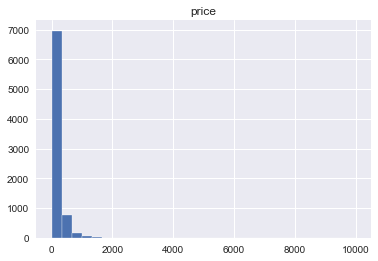

In [19]:
#price looks normally distributed
df.hist(column=['price'], bins=30)

In [24]:
df.describe()

,host_is_superhost,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable
count,8026.000000,8026.000000,8026.000000,8026.000000,8026.000000,8026.000000,8026.000000,8026.000000,8026.000000,8026.000000,8.026000e+03,8.026000e+03,8026.000000,8026.000000,8026.000000
mean,0.438575,88.951283,37.766240,-122.430023,3.159108,1.396399,1.345627,1.742088,226.208946,1.718166,1.247587e+04,1.297575e+04,45.073262,95.317451,0.412285
std,0.496243,320.650619,0.022682,0.026949,1.892758,0.925385,0.925191,1.153951,414.160869,1.330144,1.116221e+06,1.116217e+06,78.183923,6.816222,0.492277
min,0.000000,0.000000,37.708160,-122.513060,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,1.000000e+00,0.000000,20.000000,0.000000
25%,0.000000,1.000000,37.751610,-122.442655,2.000000,1.000000,1.000000,1.000000,100.000000,1.000000,2.000000e+00,2.900000e+01,1.000000,94.621554,0.000000
50%,0.000000,2.000000,37.769200,-122.424570,2.000000,1.000000,1.000000,1.000000,151.000000,1.000000,4.000000e+00,1.800000e+02,10.000000,97.000000,0.000000
75%,1.000000,12.000000,37.785695,-122.410610,4.000000,1.500000,2.000000,2.000000,240.000000,2.000000,3.000000e+01,1.125000e+03,54.000000,99.000000,1.000000
max,1.000000,1735.000000,37.810310,-122.368570,16.000000,14.000000,14.000000,14.000000,10000.000000,16.000000,1.000000e+08,1.000000e+08,757.000000,100.000000,1.000000


In [22]:
df.price.quantile(.99)

1200.0

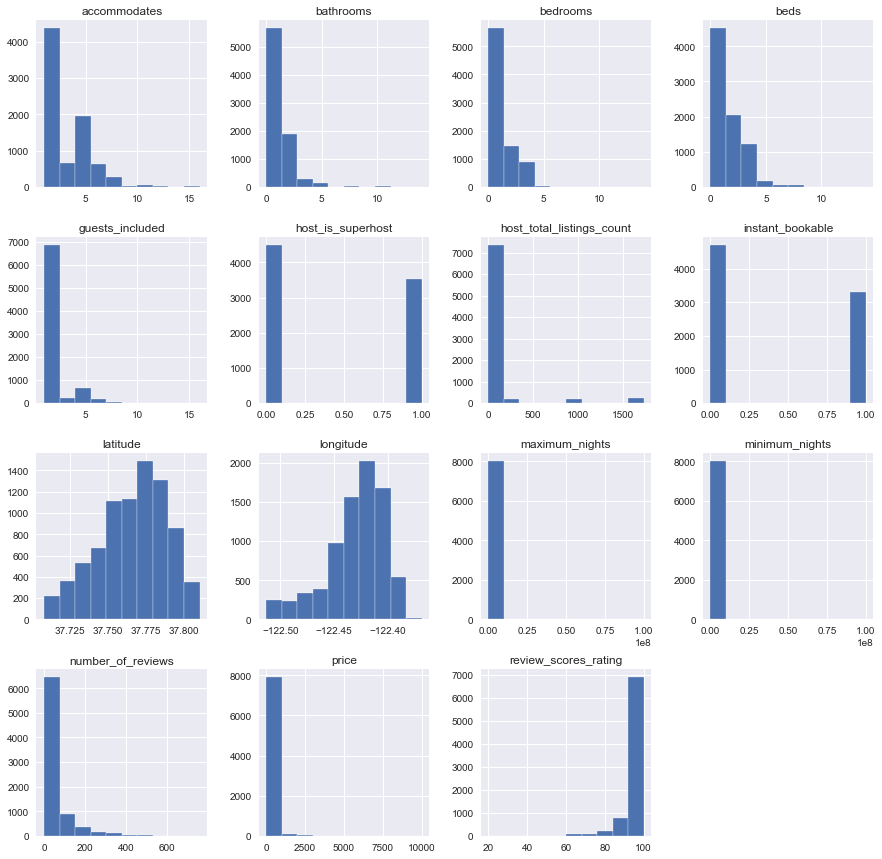

In [23]:
#histograms of the data
df.hist(figsize  = [15, 15]); 

In [31]:
#the data looks somewhat tailed, will probably clean the outliers of the data
df.describe()

,host_is_superhost,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable
count,8026.000000,8026.000000,8026.000000,8026.000000,8026.000000,8026.000000,8026.000000,8026.000000,8026.000000,8026.000000,8.026000e+03,8026.000000,8026.000000,8026.000000
mean,0.438575,88.951283,37.766240,-122.430023,3.159108,1.396399,1.345627,1.742088,226.208946,1.718166,1.247587e+04,45.073262,95.317451,0.412285
std,0.496243,320.650619,0.022682,0.026949,1.892758,0.925385,0.925191,1.153951,414.160869,1.330144,1.116221e+06,78.183923,6.816222,0.492277
min,0.000000,0.000000,37.708160,-122.513060,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,20.000000,0.000000
25%,0.000000,1.000000,37.751610,-122.442655,2.000000,1.000000,1.000000,1.000000,100.000000,1.000000,2.000000e+00,1.000000,94.621554,0.000000
50%,0.000000,2.000000,37.769200,-122.424570,2.000000,1.000000,1.000000,1.000000,151.000000,1.000000,4.000000e+00,10.000000,97.000000,0.000000
75%,1.000000,12.000000,37.785695,-122.410610,4.000000,1.500000,2.000000,2.000000,240.000000,2.000000,3.000000e+01,54.000000,99.000000,1.000000
max,1.000000,1735.000000,37.810310,-122.368570,16.000000,14.000000,14.000000,14.000000,10000.000000,16.000000,1.000000e+08,757.000000,100.000000,1.000000


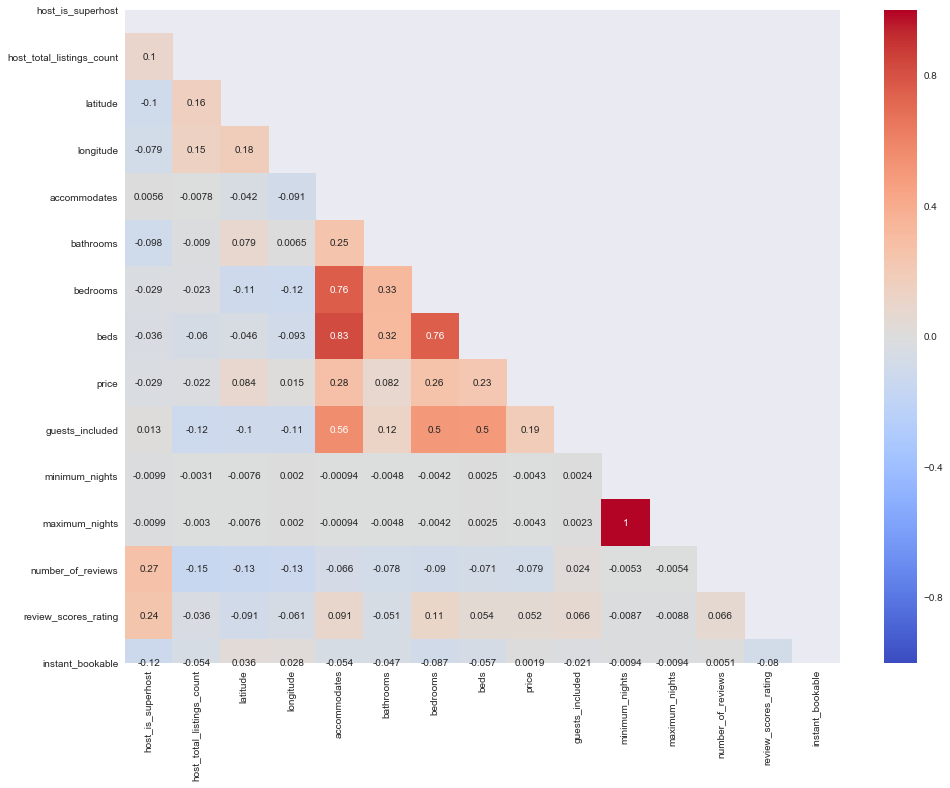

In [26]:
#creating a heatmap

f, ax = plt.subplots(figsize=(16, 12))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = matrix)




In [28]:
df['maximum_nights'].corr(df['minimum_nights'])

0.9999993862177297

Max and minimum nights have a correlaton of one so we decided to drop maximum nights. Otherswise there is little collinearity in the data outside of bedrooms/bathrooms whcih
we think is important enought to keep

In [30]:
df.drop(['maximum_nights'],axis = 1, inplace = True)

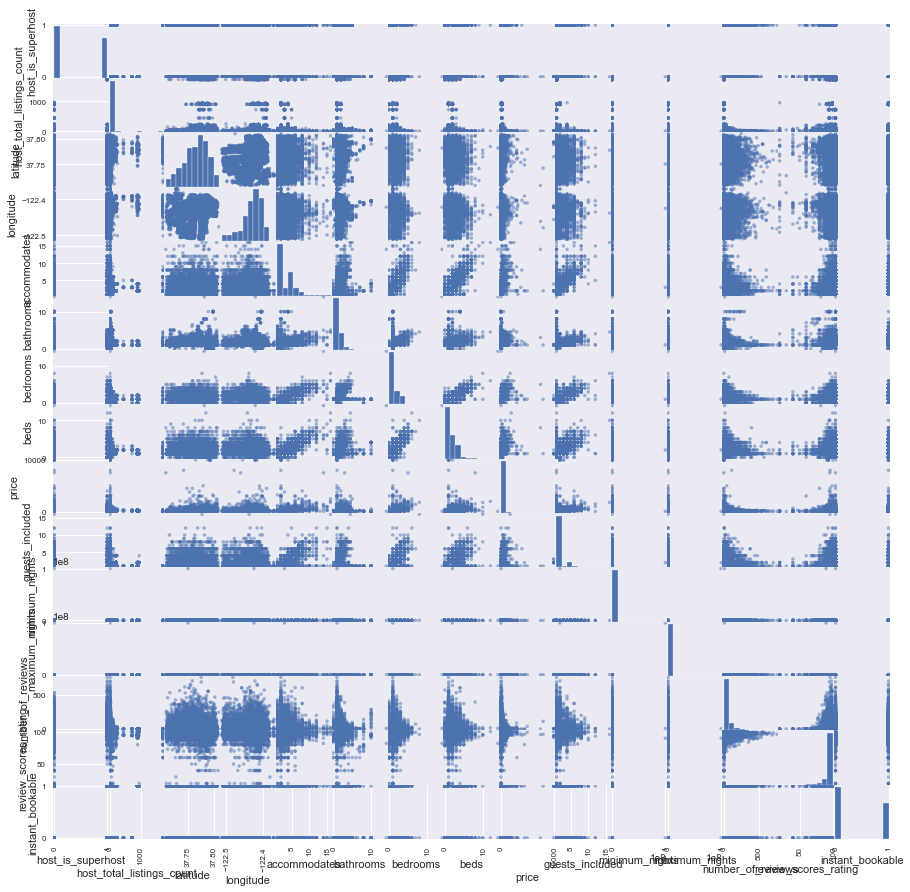

In [27]:
#looking at scatter plots of the dta
pd.plotting.scatter_matrix(df,figsize  = [15, 15]);
plt.show()

## Testing if mean price is higher for super host vs regular host
H_0: The means are the same H_A they're different
We'll use an alpha of .05

In [51]:
means = df.groupby('host_is_superhost')['price'].mean()
sigmas = df.groupby('host_is_superhost')['price'].std()
lengths = df.groupby('host_is_superhost')['price'].count()
print(means)
print(sigmas)
print(lengths)

host_is_superhost
0    236.656014
1    212.835511
Name: price, dtype: float64
host_is_superhost
0    511.943433
1    235.221271
Name: price, dtype: float64
host_is_superhost
0    4506
1    3520
Name: price, dtype: int64


In [52]:
#calculate effect size (cohen's d)
cohensd = (means[0]-means[1])/np.sqrt(((lengths[0]-1)*sigmas[0]+(lengths[1]-1)*sigmas[1])/(lengths[0]+lengths[1]-2))
cohensd

1.2052954208190212

This shows a strong effect size based on a cohen's d of 1.21

In [39]:
score = (means[0]-means[1])/(sigmas[0]/np.sqrt(lengths[0])+sigmas[1]/np.sqrt(lengths[1]))
score

2.0550553854441995

In [42]:
stats.norm.cdf(score)

0.980063172268101

We reject the null that they are the same

## Testing if mean price is higher for instant booking
H_0: The means are the same H_A they're different
We'll use an alpha of .05

In [43]:
means = df.groupby('instant_bookable')['price'].mean()
sigmas = df.groupby('instant_bookable')['price'].std()
lengths = df.groupby('instant_bookable')['price'].count()
print(means)
print(sigmas)
print(lengths)

instant_bookable
0    225.561374
1    227.132064
Name: price, dtype: float64
instant_bookable
0    299.809544
1    536.631523
Name: price, dtype: float64
instant_bookable
0    4717
1    3309
Name: price, dtype: int64


In [ ]:
#calculate effect size (cohen's d)
cohensd = (means[0]-means[1])/np.sqrt(((lengths[0]-1)*sigmas[0]+(lengths[1]-1)*sigmas[1])/(lengths[0]+lengths[1]-2))
cohensd

We see a very low cohen's d as the means of the samples look essentially the same

In [44]:
score = (means[0]-means[1])/(sigmas[0]/np.sqrt(lengths[0])+sigmas[1]/np.sqrt(lengths[1]))
score


-0.11469809408493681

In [46]:
stats.norm.cdf(score)

0.45434221232951677

In [ ]:
We fail to reject the null that they are the same. In fact looking at the data
makes it clear that they seem pretty similar.

In [54]:
df.head()

,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable
id,,,,,,,,,,,,,,,,,,
958,1,1.0,Western Addition,37.76931,-122.43386,Apartment,Entire home/apt,3,1.0,1.0,2.0,170.0,2,$25.00,1,217,97.0,0
3850,1,2.0,Inner Sunset,37.75402,-122.45805,House,Private room,2,1.0,1.0,1.0,99.0,2,$20.00,1,160,94.0,0
5858,0,2.0,Bernal Heights,37.74511,-122.42102,Apartment,Entire home/apt,5,1.0,2.0,3.0,235.0,2,$0.00,30,111,98.0,0
7918,1,10.0,Haight Ashbury,37.76669,-122.45250,Apartment,Private room,2,4.0,1.0,1.0,65.0,1,$12.00,32,18,86.0,0
8142,1,10.0,Haight Ashbury,37.76487,-122.45183,Apartment,Private room,2,4.0,1.0,1.0,65.0,1,$12.00,32,8,93.0,0


In [63]:
df.describe()

,host_is_superhost,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable
count,8026.000000,8026.000000,8026.000000,8026.000000,8026.000000,8026.000000,8026.000000,8026.000000,8026.000000,8026.000000,8.026000e+03,8026.000000,8026.000000,8026.000000
mean,0.438575,88.951283,37.766240,-122.430023,3.159108,1.396399,1.345627,1.742088,226.208946,1.718166,1.247587e+04,45.073262,95.317451,0.412285
std,0.496243,320.650619,0.022682,0.026949,1.892758,0.925385,0.925191,1.153951,414.160869,1.330144,1.116221e+06,78.183923,6.816222,0.492277
min,0.000000,0.000000,37.708160,-122.513060,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,20.000000,0.000000
25%,0.000000,1.000000,37.751610,-122.442655,2.000000,1.000000,1.000000,1.000000,100.000000,1.000000,2.000000e+00,1.000000,94.621554,0.000000
50%,0.000000,2.000000,37.769200,-122.424570,2.000000,1.000000,1.000000,1.000000,151.000000,1.000000,4.000000e+00,10.000000,97.000000,0.000000
75%,1.000000,12.000000,37.785695,-122.410610,4.000000,1.500000,2.000000,2.000000,240.000000,2.000000,3.000000e+01,54.000000,99.000000,1.000000
max,1.000000,1735.000000,37.810310,-122.368570,16.000000,14.000000,14.000000,14.000000,10000.000000,16.000000,1.000000e+08,757.000000,100.000000,1.000000


The minimum nights max looks very strange at 10 million so were going to drop that data point


In [67]:
df = df[df['minimum_nights']<366]

In [68]:
df.describe()

,host_is_superhost,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable
count,8023.000000,8023.000000,8023.000000,8023.000000,8023.000000,8023.000000,8023.000000,8023.000000,8023.000000,8023.000000,8023.000000,8023.000000,8023.000000,8023.000000
mean,0.438739,88.984171,37.766239,-122.430025,3.159417,1.396423,1.345756,1.742241,225.867506,1.718185,16.108812,45.088246,95.317445,0.412439
std,0.496264,320.706059,0.022683,0.026954,1.893022,0.925512,0.925340,1.154104,412.900732,1.330361,22.288509,78.194685,6.817033,0.492304
min,0.000000,0.000000,37.708160,-122.513060,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,20.000000,0.000000
25%,0.000000,1.000000,37.751610,-122.442680,2.000000,1.000000,1.000000,1.000000,100.000000,1.000000,2.000000,1.000000,94.621554,0.000000
50%,0.000000,2.000000,37.769200,-122.424570,2.000000,1.000000,1.000000,1.000000,151.000000,1.000000,4.000000,10.000000,97.000000,0.000000
75%,1.000000,12.000000,37.785690,-122.410610,4.000000,1.500000,2.000000,2.000000,240.000000,2.000000,30.000000,54.000000,99.000000,1.000000
max,1.000000,1735.000000,37.810310,-122.368570,16.000000,14.000000,14.000000,14.000000,10000.000000,16.000000,365.000000,757.000000,100.000000,1.000000


In [75]:
df_feat = df.copy()
df_tgt = df['price']

In [72]:
df_feat.drop(['price'],axis = 1,inplace = True)

In [76]:
df_tgt = df_tgt.DataFrame()

AttributeError: 'Series' object has no attribute 'DataFrame'